In [1]:
#Numpy and pandas easy-to-use data structures and data analysis tools for the Python programming language. 
#It allows for fast analysis and data cleaning and preparation
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
#data visualization library based on matplotlib. 
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Importing dataset
customers=pd.read_csv('/Users/cheetu/Downloads/customer-segmentation-using-K-means-master 2/Mall_Customers.csv') 
print("Shape of data=>",customers.shape)

Shape of data=> (200, 5)


In [5]:
customers.head() #printing top 5 lines of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



#/Exploring the data
Now, we check the quality of the data and the distribution of the variables.

First, we check that if there is any missing value in the dataset. K-means algorithm is not able to deal with missing values.


In [6]:
print(f"Missing values in each variable: \n{customers.isnull().sum()}")

Missing values in each variable: 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


We have no missing data. Next, we check if there is any duplicate rows or no.

In [7]:
print(f"Duplicated rows: {customers.duplicated().sum()}")

Duplicated rows: 0


We check the data type of each variable in the DataFrame. Categorical variables cannot be handled directly. K-means is based on distances. The approach for converting those variables depend on the type of categorical variables.


In [8]:
print(f"Variable:                  Type: \n{customers.dtypes}")

Variable:                  Type: 
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


Observing the distribution of variables.
Define two functions.
The first one will retrieve descriptive statistics of the variables. 
The second one will help us graph the variable distribution.

In [9]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

In [10]:
def graph_histo(x):
    if x.dtype == "int64" or x.dtype == "float64":
        # Select size of bins by getting maximum and minimum and divide the substraction by 10
        size_bins = 10
        # Get the title by getting the name of the column
        title = x.name
        #Assign random colors to each graph
        color_kde = list(map(float, np.random.rand(3,)))
        color_bar = list(map(float, np.random.rand(3,)))

        # Plot the displot
        sns.distplot(x, bins=size_bins, kde_kws={"lw": 1.5, "alpha":0.8, "color":color_kde},
                       hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                                "alpha": 0.4, "color":color_bar})
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.ylabel("Frequency", size=16, labelpad=15);
        # Customize title
        plt.title(title, size=18)
        # Customize grid and axes visibility
        plt.grid(False);
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);   
    else:
        x = pd.DataFrame(x)
        # Plot       
        sns.catplot(x=x.columns[0], kind="count", palette="spring", data=x)
        # Customize title
        title = x.columns[0]
        plt.title(title, size=18)
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.xlabel("")
        plt.ylabel("Counts", size=16, labelpad=15);        
        # Customize grid and axes visibility
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);

In [11]:
spending = customers["Spending Score (1-100)"]

In [12]:

statistics(spending)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Spending Score (1-100),50.2,25.758882,50.0,663.52


/Users/cheetu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


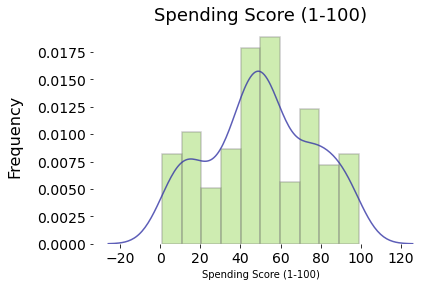

In [13]:

graph_histo(spending)

Now lets check age

In [14]:
age = customers["Age"]
statistics(age)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Age,38.85,13.934041,36.0,194.1575


/Users/cheetu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


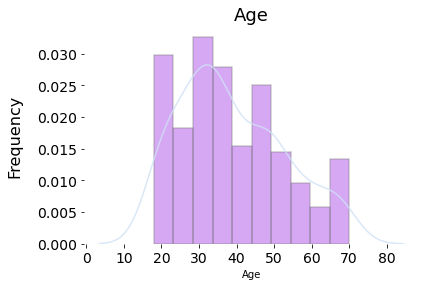

In [15]:
graph_histo(age)

Let's explore annual income

In [16]:
income = customers["Annual Income (k$)"]

In [17]:
statistics(income)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Annual Income (k$),60.56,26.198977,61.5,686.3864


/Users/cheetu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


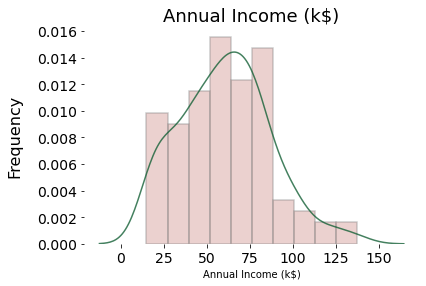

In [18]:
graph_histo(income)

Gender now

In [19]:
gender = customers["Gender"]

In [20]:
statistics(gender)

,Gender
Female,112
Male,88


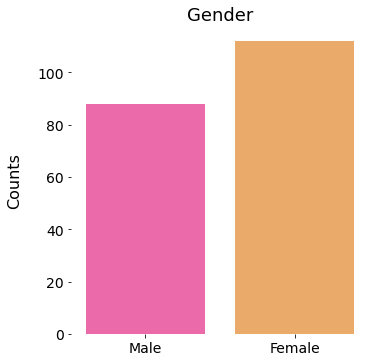

In [21]:
graph_histo(gender)

Correlation between parameteres:

We will analyze the correlation between the numeric parameters. For that, we'll use the pairplot seaborn function. We want to see whether there is a difference between gender. So, we are going to set the hue parameter to get different colors for points belonging to female or customers.

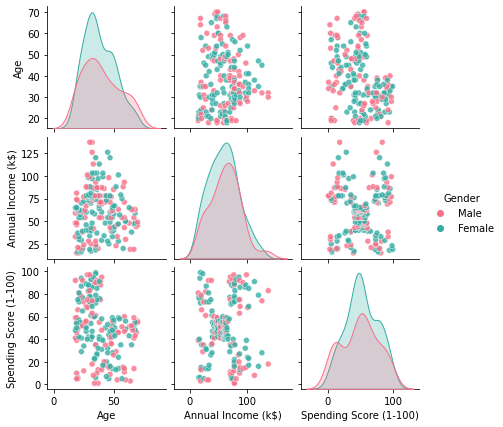

In [22]:
sns.pairplot(customers, x_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               y_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               hue = "Gender", 
               kind= "scatter",
               palette = "husl",
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8});


In order to apply K-means, we need to meet the algorithm assumptions.

K-means assumes:

Cluster's shape: The variance of the distribution is spherical meaning that clusters have a spherical shape. In order for this to be true, all variables should be normally distributed and have the same variance.
Clusters' Size: All clusters have the same number of observations.
Relationship between variables: There is little or no correlation between the variables.
In our dataset, our variables are normally distributed. Variances are quite close to each other. Except for age that has a lower variance that the rest of the variables. We could find a proper transformation to solve this issue. We could apply the logarithm or Box-Cox transformation.  Box-Cox is a family of transformations which allows us to correct non-normal distributed variables or non-equal variances.

Dimensionality reduction
After we checked that we can apply k-means, we can apply Principal Component Analysis (PCA) to discover which dimensions best maximize the variance of features involved.

Principal Component Analysis (PCA)
First, we'll transform the categorical variable into two binary variables.

In [23]:
customers["Male"] = customers.Gender.apply(lambda x: 0 if x == "Male" else 1)

In [24]:
customers["Female"] = customers.Gender.apply(lambda x: 0 if x == "Female" else 1)

In [25]:
X = customers.iloc[:, 2:]

In [26]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Male,Female
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [27]:
# Apply PCA and fit the features selected
pca = PCA(n_components=2).fit(X)

During the fitting process, the model learns some quantities from the data: the "components" and "explained variance".

In [28]:
print(pca.components_)

[[-1.88980385e-01  5.88604475e-01  7.86022241e-01  3.32880772e-04
  -3.32880772e-04]
 [ 1.30957602e-01  8.08400899e-01 -5.73875514e-01 -1.57927017e-03
   1.57927017e-03]]


In [29]:
print(pca.explained_variance_)

[700.26450987 684.33354753]


The vectors represent the principal axes of the data. The length of the vector indicates the importance of that axis in describing the distribution of the data. The projection of each data point onto the principal axes are the principal components of the data.

In [30]:
# Transform samples using the PCA fit
pca_2d = pca.transform(X)

We can represent this using a type of scatter plot called biplot. Each point is represented by its score regarding the principal components. It is helpful to understand the reduced dimensions of the data. It also helps us discover relationships between the principal components and the original variables.

K-means clustering:

In order to cluster data, we need to determine how to tell if two data points are similar. A proximity measure characterizes the similarity or dissimilarity that exists between objects.

We can choose to determine if two points are similar. So if the value is large, the points are very similar. Or choose to determine if they are dissimilar. If the value is small, the points are similar. This is what we know as "distance".

There are various distances that a clustering algorithm can use: Manhattan distance, Minkowski distance, Euclidean distance, among others.

${\sqrt{\sum_{i=1}^n (x_i-y_i)^2}}$

K-means typically uses Euclidean distance to determine how similar (or dissimilar) two points are.

First, we need to fix the numbers of clusters to use.

There are several direct methods to perform this. Among them, we find the elbow and silhouette methods.

We'll consider the total intra-cluster variation (or total within-cluster sum of square (WSS)). The goal is to minimize WSS.

The Elbow method looks at how the total WSS varies with the number of clusters.  For that, we'll compute k-means for a range of different values of k. Then, we calculate the total WSS. We plot the curve WSS vs. number of clusters.  Finally, we locate the elbow or bend of the plot. This point is considered to be the appropriate number of clusters.

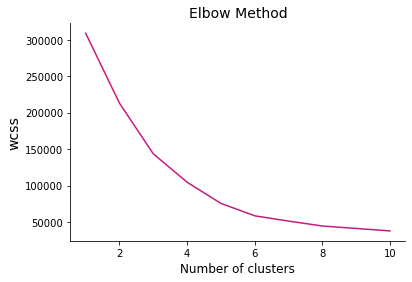

In [31]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()


How does k-means clustering works? The main idea is to select k centers, one for each cluster. There are several ways to initialize those centers. We can do it randomly, pass certain points that we believe are the center or place them in a smart way (e.g. as far away from each other as possible). Then, we calculate the Euclidean distance between each point and the cluster centers. We assign the points to the cluster center where the distance is minimum. After that, we recalculate the new cluster center. We select the point that is in the middle of each cluster as the new center.  And we start again, calculate distance, assign to cluster, calculate new centers. When do we stop? When the centers do not move anymore.

In [34]:
# Kmeans algorithm
# n_clusters: Number of clusters. In our case 5
# init: k-means++. Smart initialization
# max_iter: Maximum number of iterations of the k-means algorithm for a single run
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state: Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

# Fit and predict 
y_means = kmeans.fit_predict(X)

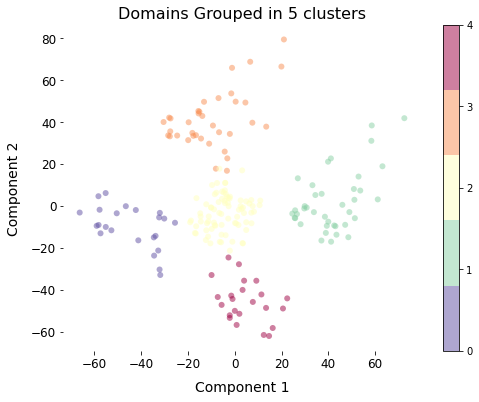

In [35]:
fig, ax = plt.subplots(figsize = (8, 6))

plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c=y_means, 
            edgecolor="none", 
            cmap=plt.cm.get_cmap("Spectral_r", 5),
            alpha=0.5)
        
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Component 1", size = 14, labelpad=10)
plt.ylabel("Component 2", size = 14, labelpad=10)

plt.title('Domains Grouped in 5 clusters', size=16)


plt.colorbar(ticks=[0, 1, 2, 3, 4]);

plt.show()


In [36]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ["Age", "Annual Income", "Spending", "Male", "Female"])

In [37]:
centroids.index_name = "ClusterID"

centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)

In [34]:
centroids

,Age,Annual Income,Spending,Male,Female,ClusterID
0,45.217391,26.304348,20.913043,0.608696,0.391304,0
1,32.692308,86.538462,82.128205,0.538462,0.461538,1
2,43.088608,55.291139,49.569620,0.582278,0.417722,2
3,40.666667,87.750000,17.583333,0.472222,0.527778,3
4,25.521739,26.304348,78.565217,0.608696,0.391304,4



The most important features appear to be Annual Income and Spending score.  We have people whose income is low but spend in the same range - segment 0. People whose earnings a high and spend a lot - segment 1. Customers whose income is middle range but also spend at the same level - segment 2.  Then we have customers whose income is very high but they have most spendings - segment 3. And last, people whose earnings are little but they spend a lot- segment 4.

Imagine that tomorrow we have a new member. And we want to know which segment that person belongs. We can predict this.

In [38]:
X_new = np.array([[22,10,9,0,2]]) 
 
new_customer = kmeans.predict(X_new)
print(f"The new customer belongs to segment {new_customer[0]}")

The new customer belongs to segment 0
